# Pinhole Analysis

### Imports & Function Definitions

In [1]:
# current date, for retrieving data from proper location.
year = "2023"
day ="27"
month = "october"

## Imports and initialization

In [2]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

/var/folders/q3/7q7h5wgx05gc4y1b8s_8jqm00000gp/T/ipykernel_59276/3333626279.py:65: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [5]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special as special
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif';
rcParams['axes.linewidth'] = 1.5;
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 15
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['ytick.labelsize'] = 15
rcParams['lines.linewidth'] = 2.5
rcParams['lines.color'] = 'k'
plot_width = 10;
plot_height = 5;
# plt.grid(False);

In [7]:
%config Completer.use_jedi = False
import scipy.signal
import numpy as np 
from numpy import array as arr
from matplotlib import gridspec
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon
from uncertainties import ufloat
from uncertainties.umath import sqrt as usqrt
import sys
sys.path.append("..")
import Analysis_Python_Files.AnalysisHelpers as ah
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImage
from Analysis_Python_Files.AnalysisHelpers import extract_NA_2pinholes
from Analysis_Python_Files.AnalysisHelpers import findImageMaximaCoords
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImagePinhole

In [45]:
year = "2022"
month = "December"
day = "29"
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(ah)
reloadMyModules()

In [46]:
def fixPcolormesh(Xtmp,Ytmp):
    return (np.concatenate([Xtmp,[Xtmp[-1]+(Xtmp[1]-Xtmp[0])]])-(Xtmp[1]-Xtmp[0])/2,
               np.concatenate([Ytmp,[Ytmp[-1]+(Ytmp[1]-Ytmp[0])]])-(Ytmp[1]-Ytmp[0])/2)

In [47]:
def oneD_Gauss(XX, amp, x0, sigma, offset):
    return amp * np.exp(-(XX - x0)**2 / (2 * sigma**2)) + offset

In [48]:
def twoD_Gauss(XXYY, amp, xo, yo, sigma_x, sigma_y, theta, offset):
    (XX,YY) = XXYY                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)   
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)    
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)   
    g = offset + amp*np.exp( - (a*((XX-xo)**2) + 2*b*(XX-xo)*(YY-yo)         
                        + c*((YY-yo)**2)))                                   
    return g.ravel()

In [49]:
def oneAiry(XXYY, x1,y1,NA,offset,amp1):
    aof =  np.sqrt(NA**2/(1-NA**2))
    (XX,YY) = XXYY
    airy1amp = (special.jn(1,2*np.pi*aof*np.sqrt((XX-x1)**2+(YY-y1)**2))\
             /(2*np.pi*aof*np.sqrt((XX-x1)**2+(YY-y1)**2)))
    return (amp1 * np.abs(airy1amp)**2 + offset).ravel()

# Sacred Pinhole - Zhenpu's images

In [16]:
# sacred pinhole data
reloadMyModules(1)
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImage
file_path = '\\\\jilafile.colorado.edu\\scratch\\regal\\common\\LabData\\NewRb\\Users\\Zhenpu\\AspherePinholeTest\\'
df = pd.read_csv(file_path + './SacredPinhole300nmDia_6.8umApart/780nm_Sacred_CameraInFoucs_ImageMaxIntensity_Yp100um_X1272Y1820.csv',header=None)
data = df.values
initfit = fitManyGaussianImage(data,2,threshold=100) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
print(initfit)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\jilafile.colorado.edu\\scratch\\regal\\common\\LabData\\NewRb\\Users\\Zhenpu\\AspherePinholeTest\\./SacredPinhole300nmDia_6.8umApart/780nm_Sacred_CameraInFoucs_ImageMaxIntensity_Yp100um_X1272Y1820.csv'

### Normalize Image

2D Airy NA = 0.481+/-0.006
2D Gauss NA = 0.494+/-0.013


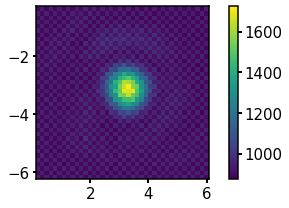

In [612]:
wavelength = 0.78 # um
pixel_factor = 6.8 # pitch (distance apart)
magnification = (np.sqrt((initfit[2]-initfit[7])**2 + (initfit[3]-initfit[8])**2)) / (pixel_factor/wavelength)
xslice = [int(initfit[2])-20,int(initfit[2])+20]; # peak +/- 20
yslice = [int(initfit[3])-20,int(initfit[3])+20]; # peak +/- 20
rr = np.linspace(-(data.shape[0]/2-0.5),(data.shape[0]/2-0.5),data.shape[0])/ (magnification) 
# create normalized 1D array to use for x/y axis in normalized meshgrid - magnification (500/27.23)
# 500 is ...   27 is ...
XX,YY = np.meshgrid(rr[xslice[0]:xslice[1]],rr[yslice[0]:yslice[1]]) # create normalized square matrix coordinates 
img = plt.pcolormesh(*(fixPcolormesh(rr[xslice[0]:xslice[1]],rr[yslice[0]:yslice[1]])),
               data[yslice[0]:yslice[1], xslice[0]:xslice[1]])
plt.axis('square')
plt.gcf().set_size_inches(6, 3)
plt.colorbar()


amp = np.max(data[yslice[0]:yslice[1]])
NA = 0.5
offset = np.min(data[yslice[0]:yslice[1]])
x1,y1 = rr[int(initfit[2])]+0.1,rr[int(initfit[3])]+0.1
popt2A, pcov2A = (curve_fit(oneAiry,(XX,YY),
                       data[yslice[0]:yslice[1], xslice[0]:xslice[1]].ravel(),
                            p0 = (x1,y1,NA,offset,amp)))
NA_airy = np.sqrt(popt2A[2]**2/(1-popt2A[2]**2)) 
x_air = ufloat(popt2A[2], np.sqrt(pcov2A.diagonal())[2]*1.95)
NA_airy_unc = usqrt(x_air**2/(1-x_air**2)) 

### Gaussian NA
x0,y0 = rr[int(initfit[2])]+0.1,rr[int(initfit[3])]+0.1
offset = np.min(data[yslice[0]:yslice[1]])
theta = np.pi/2
sigma_y,sigma_x = np.std(XX), np.std(YY)
popt2G, pcov2G = (curve_fit(twoD_Gauss,(XX,YY), data[yslice[0]:yslice[1], 
                xslice[0]:xslice[1]].ravel(),p0 = (amp,x0,y0,sigma_y,sigma_x,theta,offset)))

NA_gauss = np.sqrt(popt2G[3]**2/(1-popt2G[3]**2))
x_2DG = ufloat(popt2G[3], np.sqrt(pcov2G.diagonal())[3]*1.95)
NA_gauss_unc = usqrt(x_2DG**2/(1-x_2DG**2))

print('2D Airy NA =',NA_airy_unc)
print('2D Gauss NA =',NA_gauss_unc)

## Airy Fit

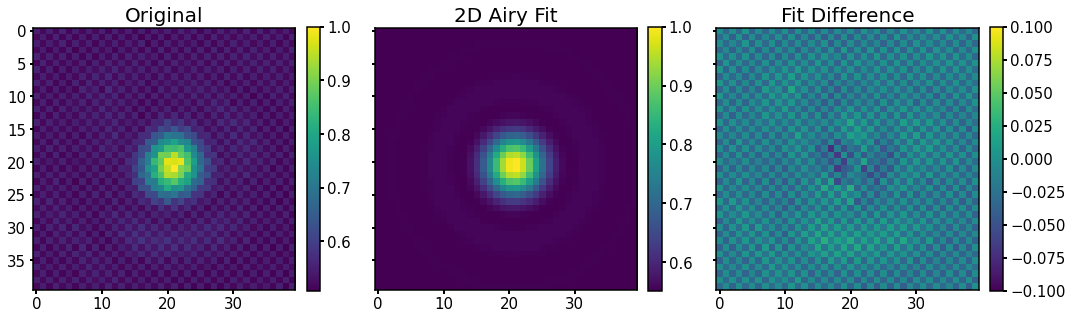

In [544]:
# Create x and y indices
x = np.linspace(1, 40, 40)
y = np.linspace(1, 40, 40)
xx, yy = np.meshgrid(x, y)

# define coordinates of peak 
x1 = np.amax(x)/2+0.1
y1 = np.amax(y)/2+0.1

# define pinhole image data and normalize
im2 = data[int(initfit[3]-20):int(initfit[3]+20),int(initfit[2]-20):int(initfit[2]+20)]
im2_norm = im2/np.amax(im2)

# Define Airy function arguments
NA_guess = 0.5
offset = np.amin(im2_norm)
amp = np.amax(im2_norm)
np.seterr(invalid='ignore') 

# Generate fit and create 2D array
popt2A, pcov2A = (curve_fit(oneAiry,(xx,yy),im2_norm.ravel(), p0 = (x1,y1,NA_guess,offset,amp)))
airy_fit = oneAiry((xx, yy), *popt2A).reshape(40,40)
airy_fit_norm = airy_fit/np.max(airy_fit)

# Plot 
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(15, 10), ncols=3, sharey=True)
fig.tight_layout()
pos1 = ax1.imshow(im2_norm)
pos2 = ax2.imshow(airy_fit_norm)
pos3 = ax3.imshow(im2_norm - airy_fit_norm,vmin=-.1, vmax=.1)
plt.colorbar(pos3,ax=ax3,fraction=0.046, pad=0.04)
plt.colorbar(pos2,ax=ax2,fraction=0.046, pad=0.04)
plt.colorbar(pos1,ax=ax1,fraction=0.046, pad=0.04)
ax1.set_title('Original')
ax2.set_title('2D Airy Fit')
ax3.set_title('Fit Difference');

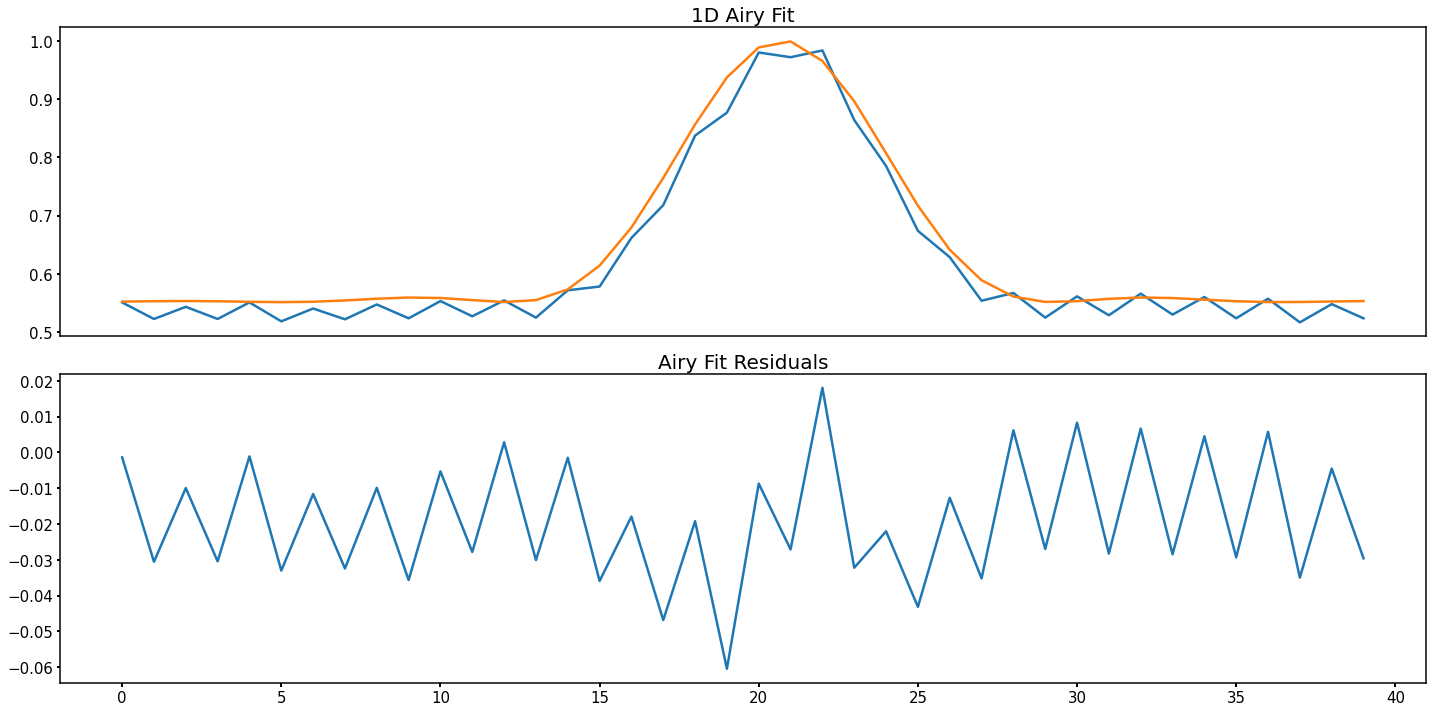

In [541]:
res_range = np.arange(0,len(im2),1)
airy_res = im2_norm[int(len(im2)/2)][0:len(im2)]-airy_fit_norm[int(len(im2)/2)][0:len(im2)]
plt.figure(figsize=(20,10))
plt.tight_layout()

# fig,(ax1,ax2) = plt.subplots(figsize=(20, 10), ncols=1,nrows=2, sharex=True)
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax1.plot(res_range,im2_norm[int(len(im2)/2)][0:len(im2)])
ax1.set_xticks([])
ax1.plot(res_range,airy_fit_norm[int(len(im2)/2)][0:len(im2)])
ax2.plot(res_range, airy_res)
ax1.set_title('1D Airy Fit')
ax2.set_title('Airy Fit Residuals');

Found 2 Maxima.
Found 2 Maxima.
sigma_x (pinhole 1) =  0.57435 um
sigma_y (pinhole 1) 0.42497 um
average waist (pinhole 1)=  0.49966 um
Airy NA (pinhole 1) = 0.437+/-0.005
Gauss NA (pinhole 1) = 0.469+/-0.006
Average NA (pinhole 1) = 0.453+/-0.004
sigma_x (pinhole 2) =  0.53393 um
sigma_y (pinhole 2) 0.42244 um
average waist (pinhole 2)=  0.47819 um
Airy NA (pinhole 2) = 0.447+/-0.004
Gauss NA (pinhole 2) = 0.466+/-0.005
Average NA (pinhole 2) = 0.4564+/-0.0030


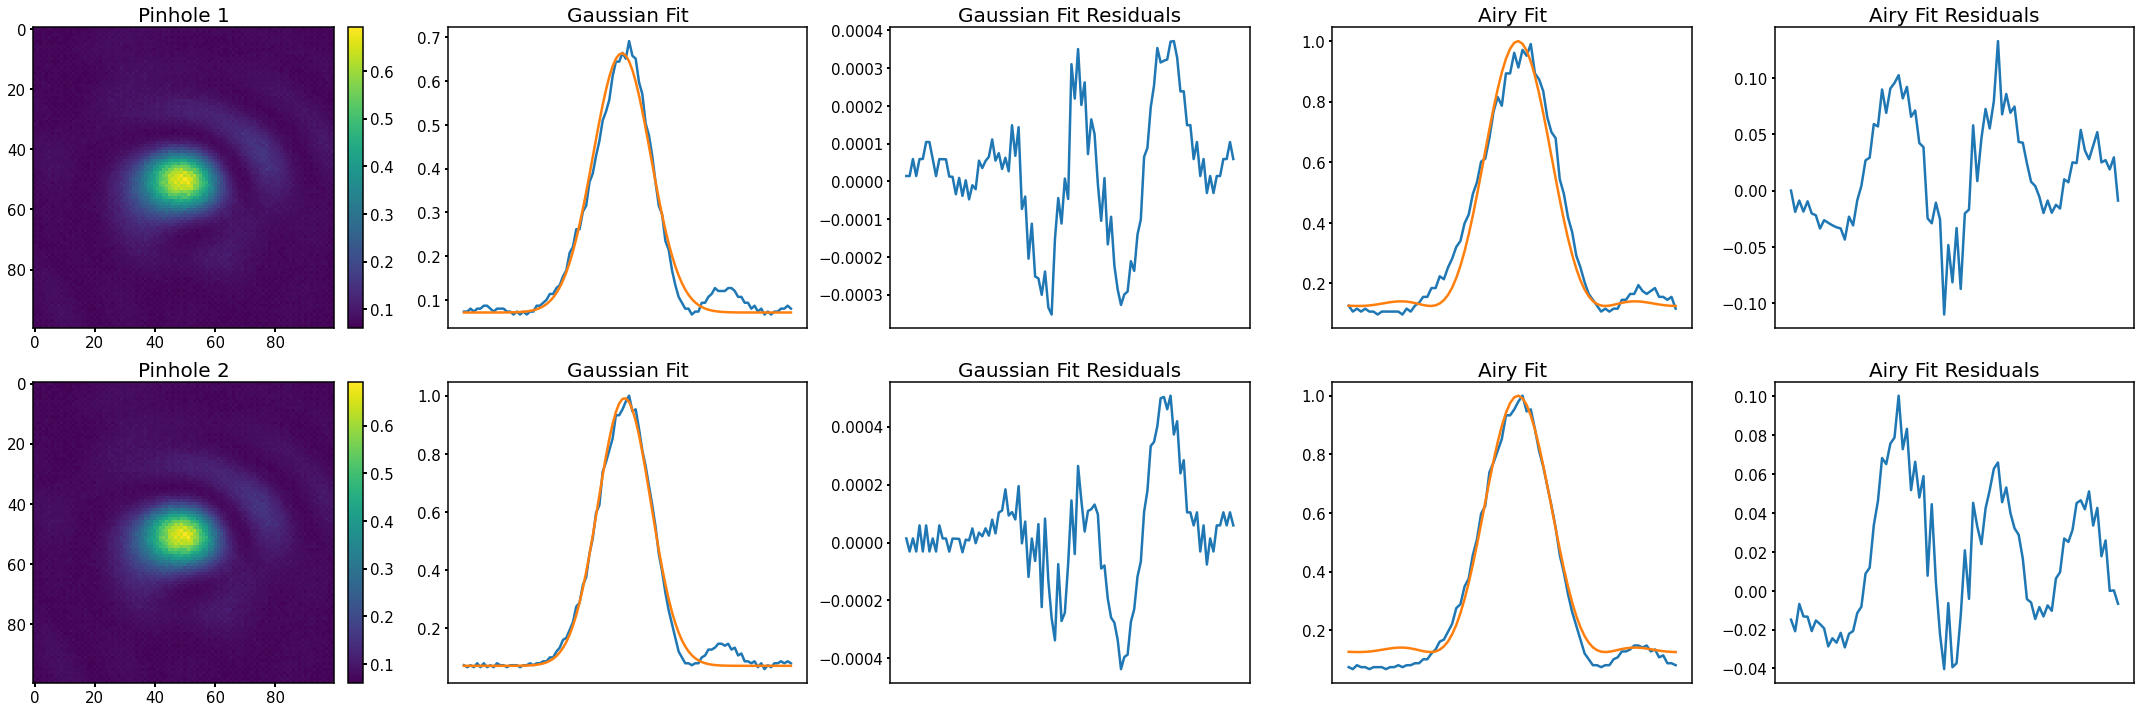

In [366]:
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_pinhole\\new_mount\\nist new7.bmp' #7 and 16
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
imshow(data)


# NIST Pinhole 

## Amit Pinholes 7/15/21

### 350 nm Pinhole: 10 nm Ti - 400 nm Au (Au front)

Found 2 Maxima.
Found 2 Maxima.
sigma_x (pinhole 1) =  0.57435 um
sigma_y (pinhole 1) 0.42497 um
average waist (pinhole 1)=  0.49966 um
Airy NA (pinhole 1) = 0.437+/-0.005
Gauss NA (pinhole 1) = 0.469+/-0.006
Average NA (pinhole 1) = 0.453+/-0.004
sigma_x (pinhole 2) =  0.53393 um
sigma_y (pinhole 2) 0.42244 um
average waist (pinhole 2)=  0.47819 um
Airy NA (pinhole 2) = 0.447+/-0.004
Gauss NA (pinhole 2) = 0.466+/-0.005
Average NA (pinhole 2) = 0.4564+/-0.0030


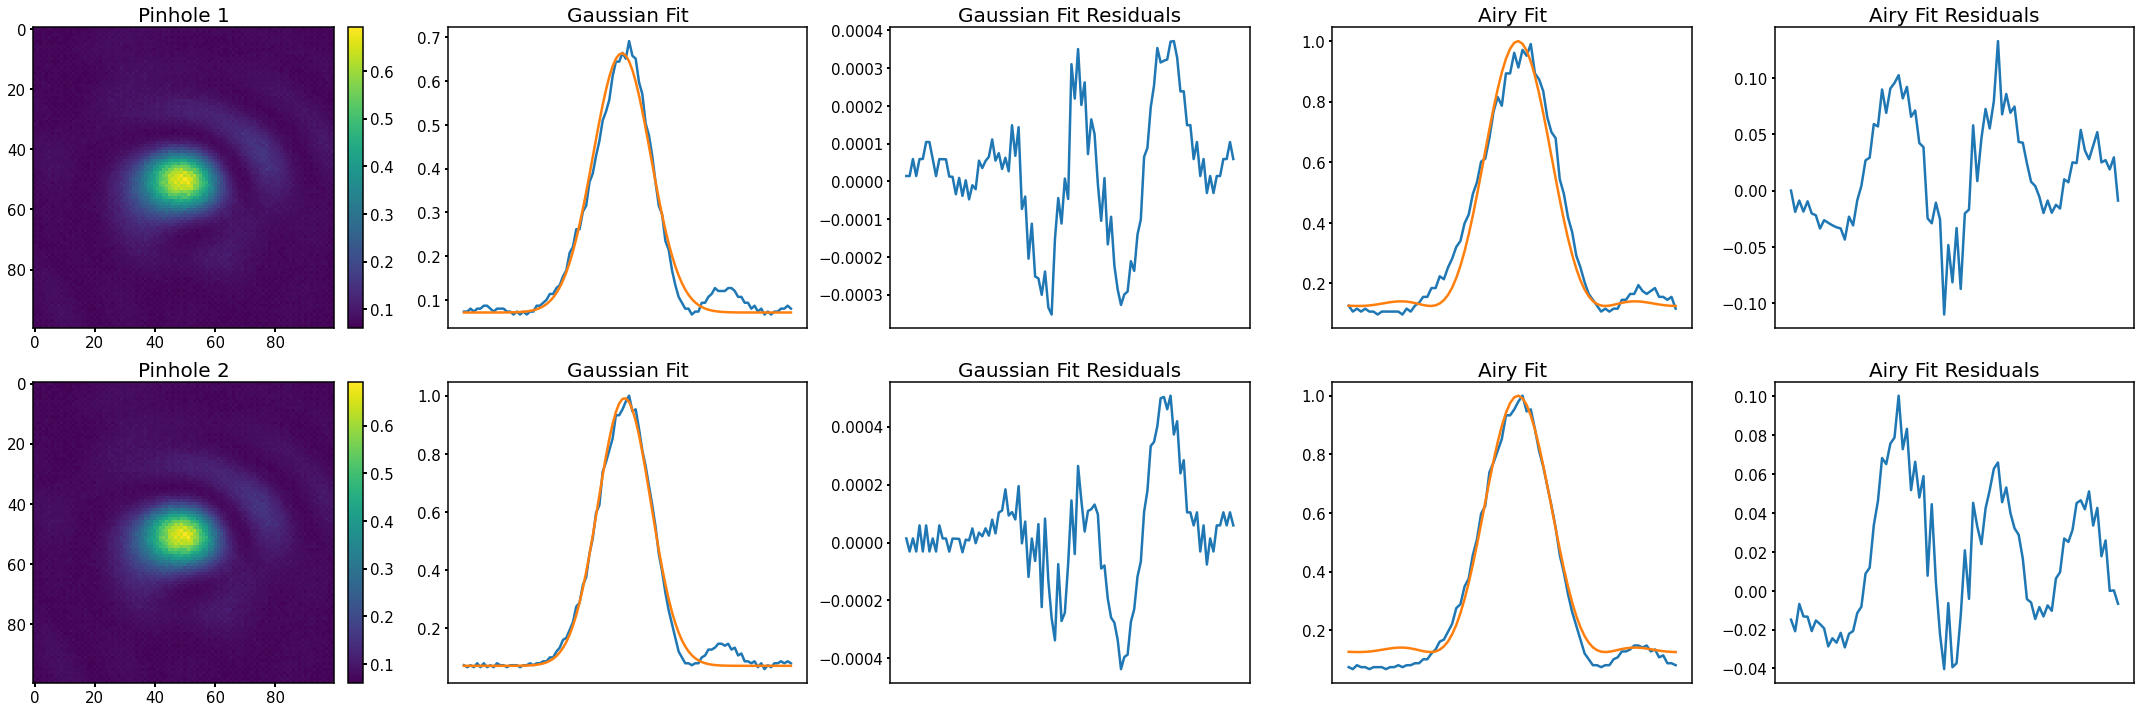

In [366]:
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_pinhole\\new_mount\\nist new7.bmp' #7 and 16
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
data = data[100:500,700:1100]
# chk = data[225:226,0:300]
imshow(data)
threshold =50
coords = findImageMaximaCoords(data,2,threshold=threshold,neighborhood_size=20)
# print(coords)
# data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
# ave_waist = (initfit[4]+initfit[5])/2
# print('sigma_x = ',initfit[4], 'sigma_y',initfit[5])
# print('average waist = ',ave_waist)

## Amit Pinholes 10/22/22

### 350 nm Pinhole: 10 nm Ti - 400 nm Au - 10 nm Ti

Found 2 Maxima.
Found 2 Maxima.
sigma_x (pinhole 1) =  0.43264 um
sigma_y (pinhole 1) 0.50531 um
average waist (pinhole 1)=  0.46897 um
Airy NA (pinhole 1) = 0.4524+/-0.0026
Gauss NA (pinhole 1) = 0.480+/-0.004
Average NA (pinhole 1) = 0.4661+/-0.0023
sigma_x (pinhole 2) =  0.42374 um
sigma_y (pinhole 2) 0.49461 um
average waist (pinhole 2)=  0.45917 um
Airy NA (pinhole 2) = 0.4611+/-0.0027
Gauss NA (pinhole 2) = 0.468+/-0.004
Average NA (pinhole 2) = 0.4645+/-0.0024


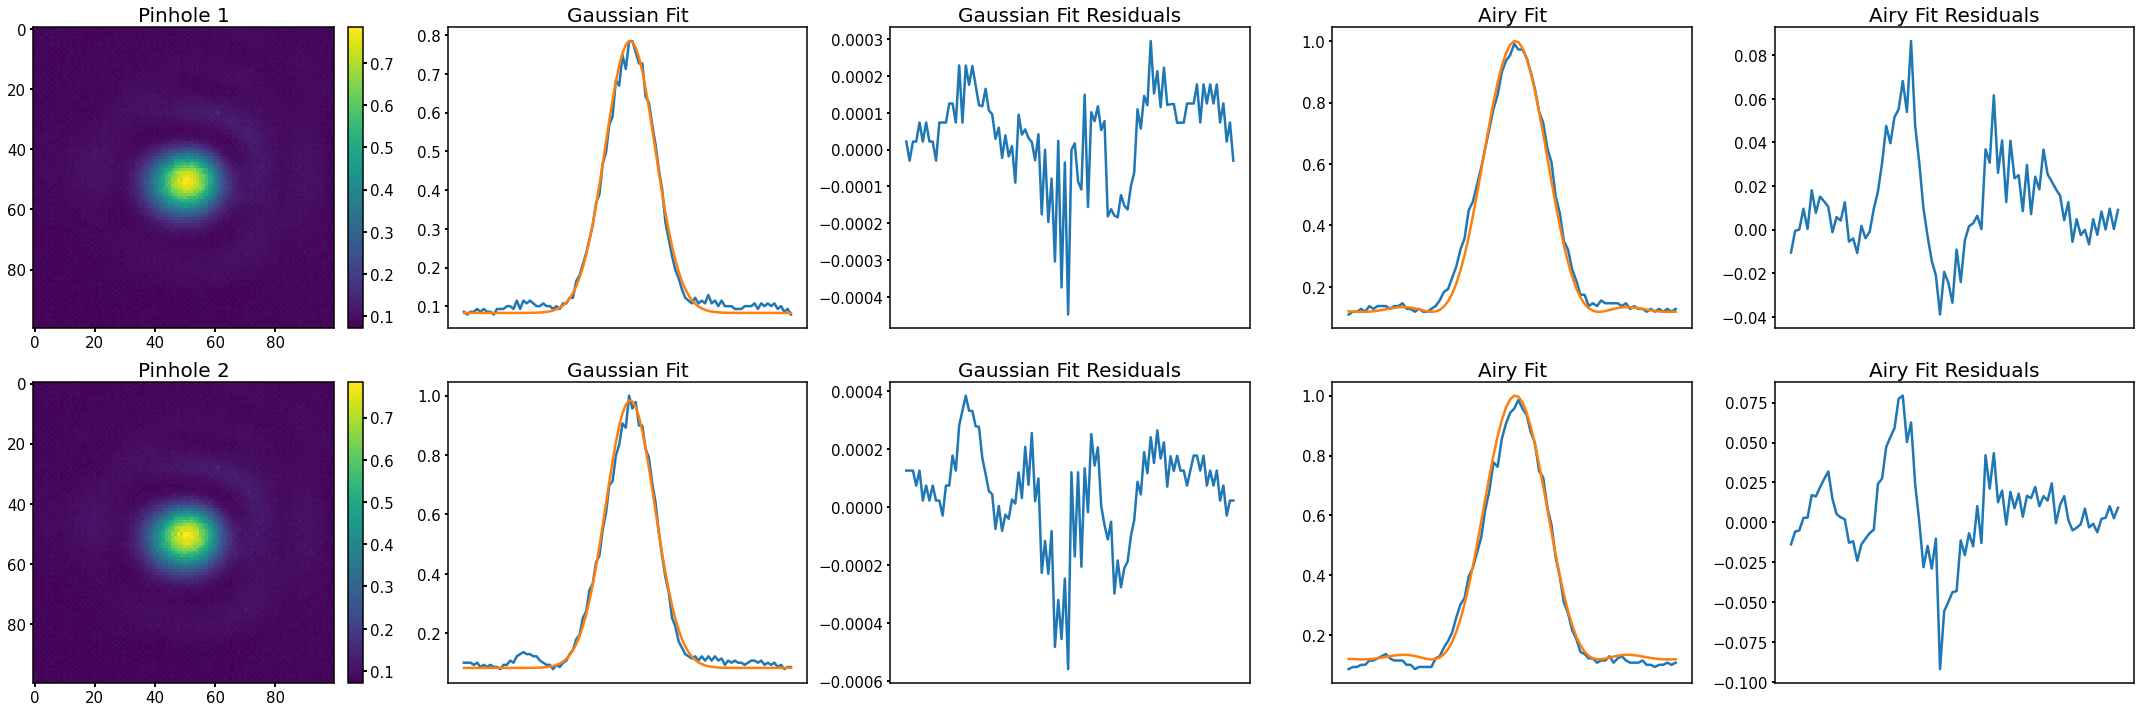

In [361]:
reloadMyModules(29)
from Analysis_Python_Files.AnalysisHelpers import extract_NA_2pinholes
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_10_22_22\\350nm_10Ti_400Au_10Ti\\350_7.bmp' #7 and 16
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
# data = data[800:1400,1000:1400]
# imshow(data)
threshold =50
coords = findImageMaximaCoords(data,2,threshold=threshold,neighborhood_size=20)
data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20,pixel_factor=7,wavelength=0.852) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]


### 350 nm Pinhole: 10 nm Ti - 400 nm Au (Au front)

Found 2 Maxima.
Found 2 Maxima.
sigma_x (pinhole 1) =  0.37697 um
sigma_y (pinhole 1) 0.445 um
average waist (pinhole 1)=  0.41099 um
Airy NA (pinhole 1) = 0.516+/-0.004
Gauss NA (pinhole 1) = 0.497+/-0.007
Average NA (pinhole 1) = 0.507+/-0.004
sigma_x (pinhole 2) =  0.37395 um
sigma_y (pinhole 2) 0.46393 um
average waist (pinhole 2)=  0.41894 um
Airy NA (pinhole 2) = 0.514+/-0.004
Gauss NA (pinhole 2) = 0.524+/-0.008
Average NA (pinhole 2) = 0.519+/-0.004


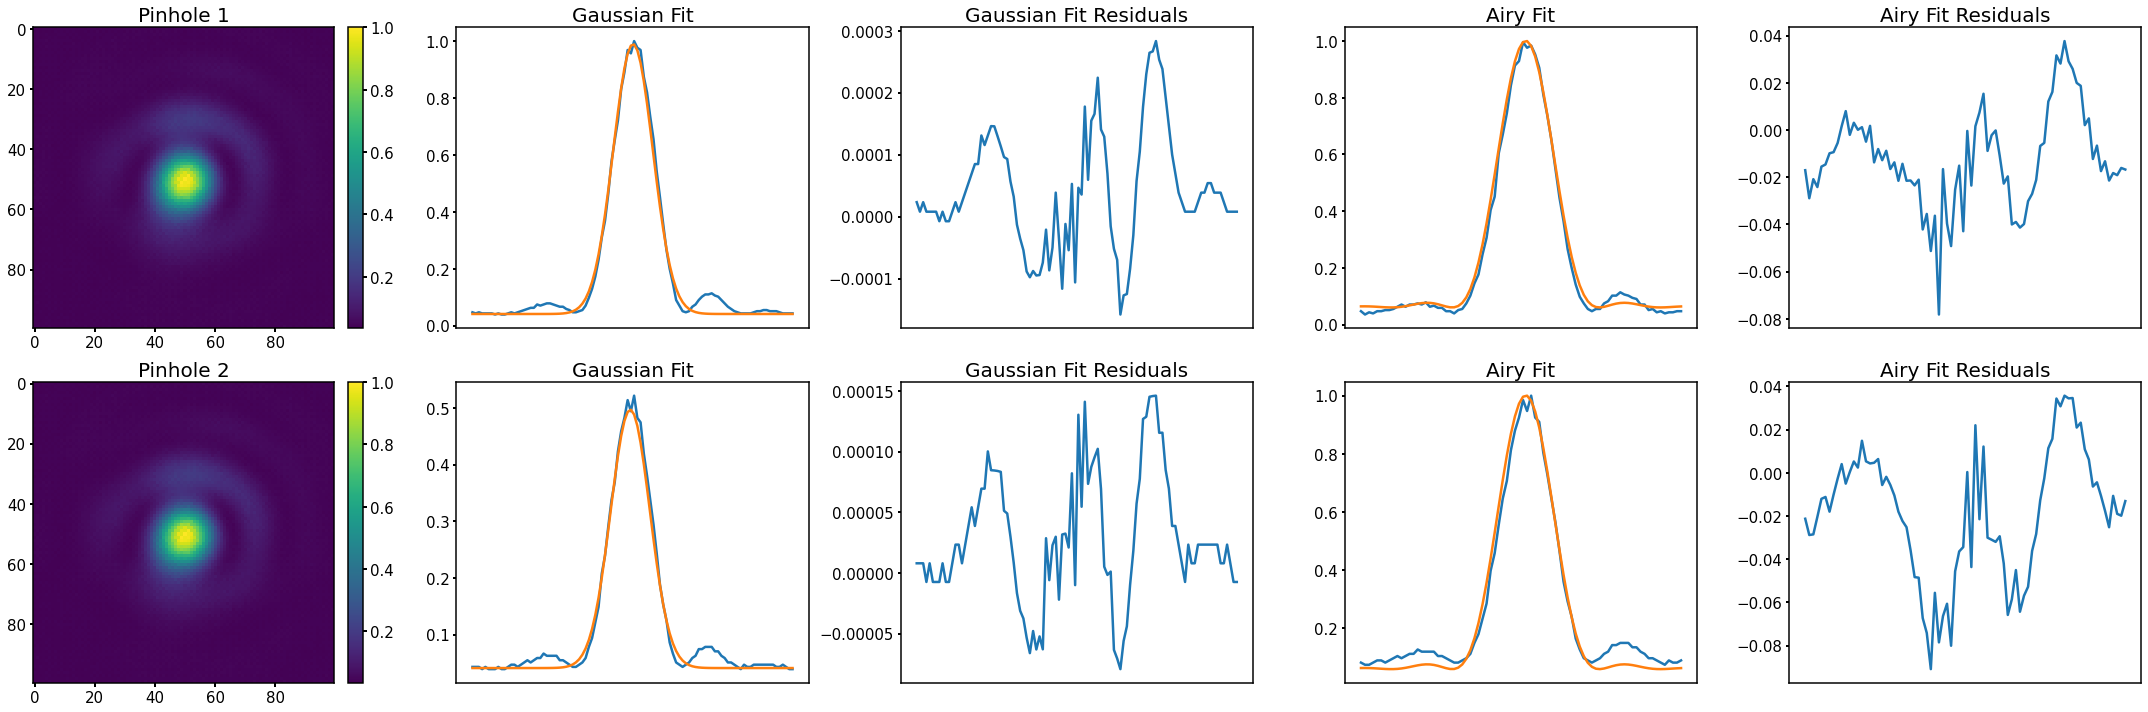

In [365]:
reloadMyModules(29)
from Analysis_Python_Files.AnalysisHelpers import extract_NA_2pinholes
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_10_22_22\\350nm_10Ti_400Au\\350nm_10Ti_400Au_1.bmp'
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
# data = data[800:1400,1000:1400]
# imshow(data)
threshold =91
coords = findImageMaximaCoords(data,2,threshold=threshold,neighborhood_size=20)
data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
# print(initfit)

### 350 nm Pinhole: 10 nm Ti - 400 nm Au (Ti front)

In [50]:
reloadMyModules(29)
from Analysis_Python_Files.AnalysisHelpers import extract_NA_2pinholes
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_10_22_22\\350nm_10Ti_400Au\\77_Ti_side.bmp'
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
# data = data[800:1400,1000:1400]
# imshow(data)
threshold =91
coords = findImageMaximaCoords(data,2,threshold=threshold,neighborhood_size=20)
data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
# print(initfit)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_10_22_22\\350nm_10Ti_400Au\\77_Ti_side.bmp'

### 200 nm Pinhole: 10 nm Ti - 400 nm Au (Au front)

Found 1 Maxima.
Found 1 Maxima.
[(71, 67)]
[44.37145825 80.33330571 69.89168687 67.10094749  8.38684466  7.90073075]


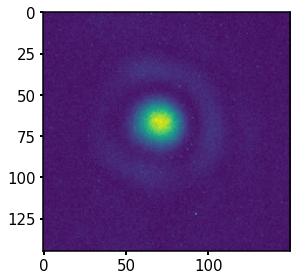

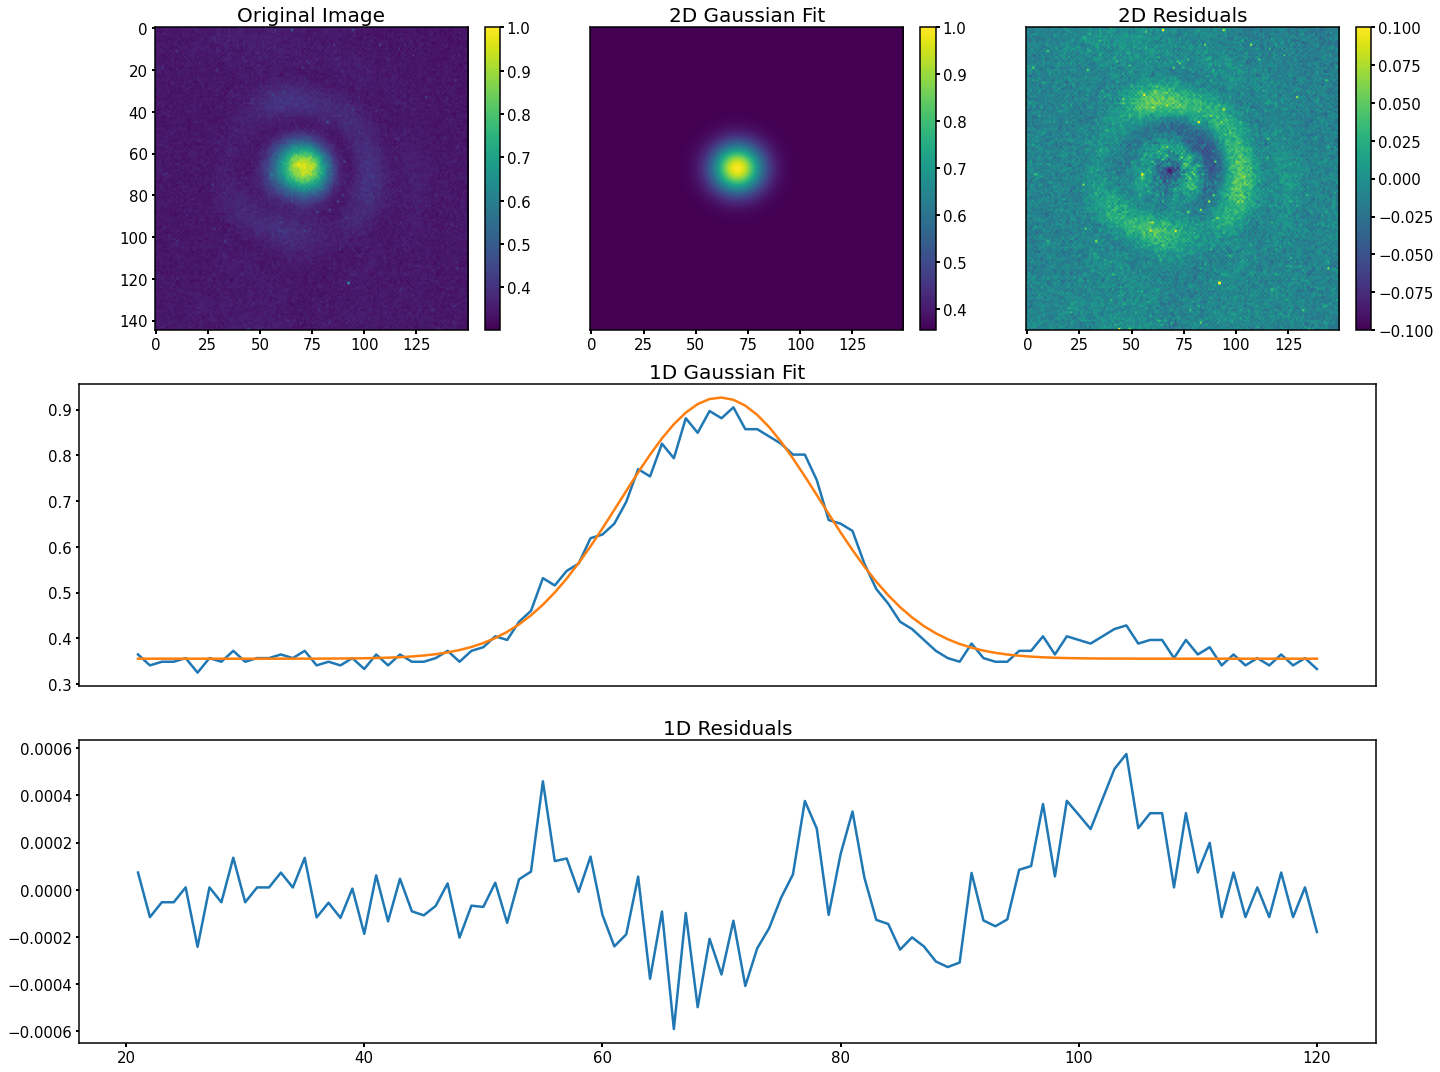

In [309]:
reloadMyModules(29)
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImagePinhole
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_10_22_22\\200nm_10Ti_400Au\\31.bmp' #7 and 16
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
data = data[500:1600,1100:2300]
# data = data[720:880,280:440] # left pinhole
data = data[375:520,680:830] # right pinhole
imshow(data)
threshold =60
coords = findImageMaximaCoords(data,1,threshold=threshold,neighborhood_size=20)
# print(coords)
# data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
# initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
optParam,im_norm,zpts_fit_norm,fit_diff_norm = fitManyGaussianImagePinhole(data, 1, neighborhood_size=20, threshold=threshold)
print(optParam)

# Sample image (macbook)

/Users/stevenpampel/Documents/B232_Data_Analysis/Data_Analysis_Notebook/Analysis by Type/../../Analysis_Python_Files/AnalysisHelpers.py:158: DeprecationWarning:

Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.

/Users/stevenpampel/Documents/B232_Data_Analysis/Data_Analysis_Notebook/Analysis by Type/../../Analysis_Python_Files/AnalysisHelpers.py:160: DeprecationWarning:

Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.



Found 2 Maxima.
Found 2 Maxima.
sigma_x (pinhole 1) =  0.47058 um
sigma_y (pinhole 1) 0.42026 um
average waist (pinhole 1)=  0.44542 um
Airy NA (pinhole 1) = 0.4708+/-0.0025
Gauss NA (pinhole 1) = 0.463+/-0.004
Average NA (pinhole 1) = 0.4670+/-0.0025
sigma_x (pinhole 2) =  0.47041 um
sigma_y (pinhole 2) 0.42199 um
average waist (pinhole 2)=  0.4462 um
Airy NA (pinhole 2) = 0.4704+/-0.0024
Gauss NA (pinhole 2) = 0.465+/-0.004
Average NA (pinhole 2) = 0.4679+/-0.0025
Found 2 Maxima.
[(250, 250), (371, 261)]


/Users/stevenpampel/Documents/B232_Data_Analysis/Data_Analysis_Notebook/Analysis by Type/../../Analysis_Python_Files/AnalysisHelpers.py:506: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



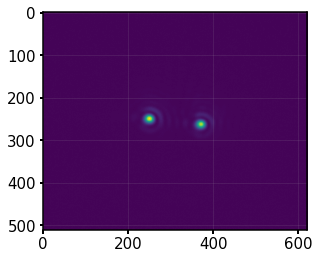

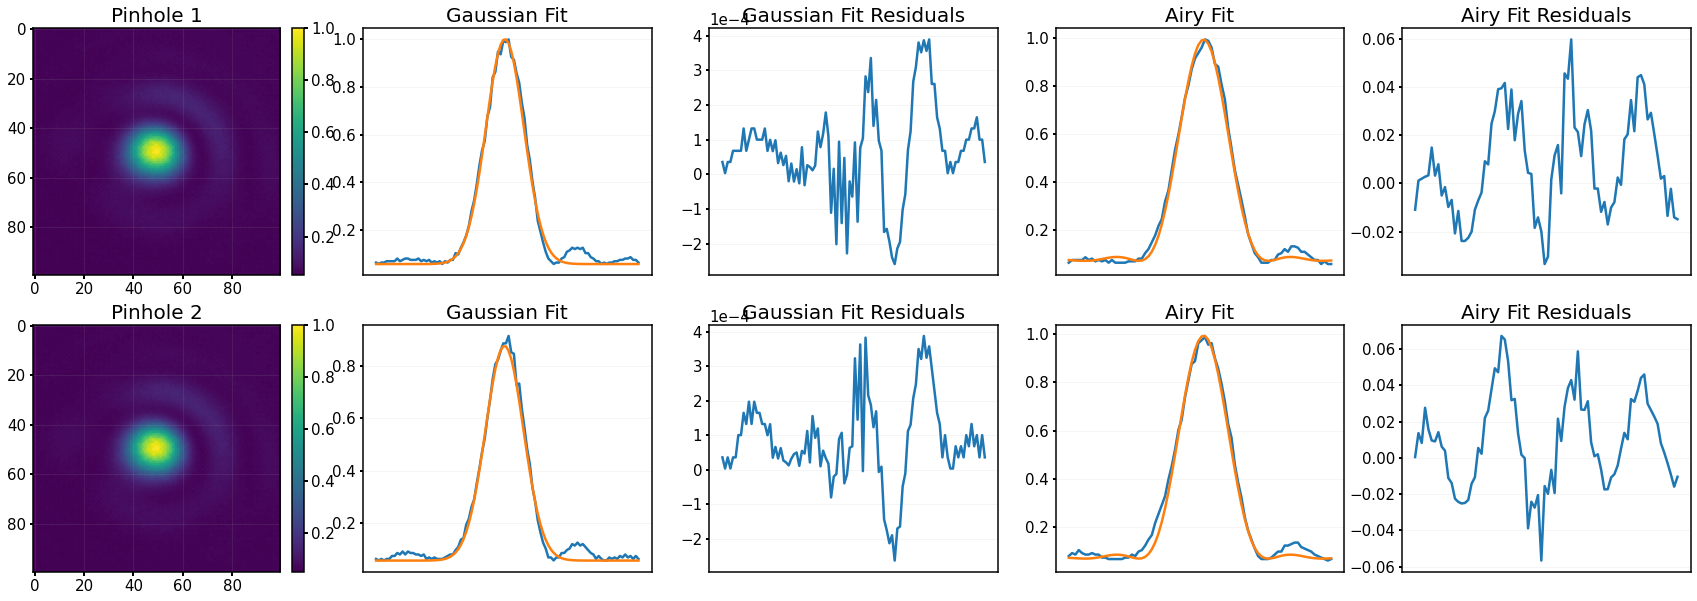

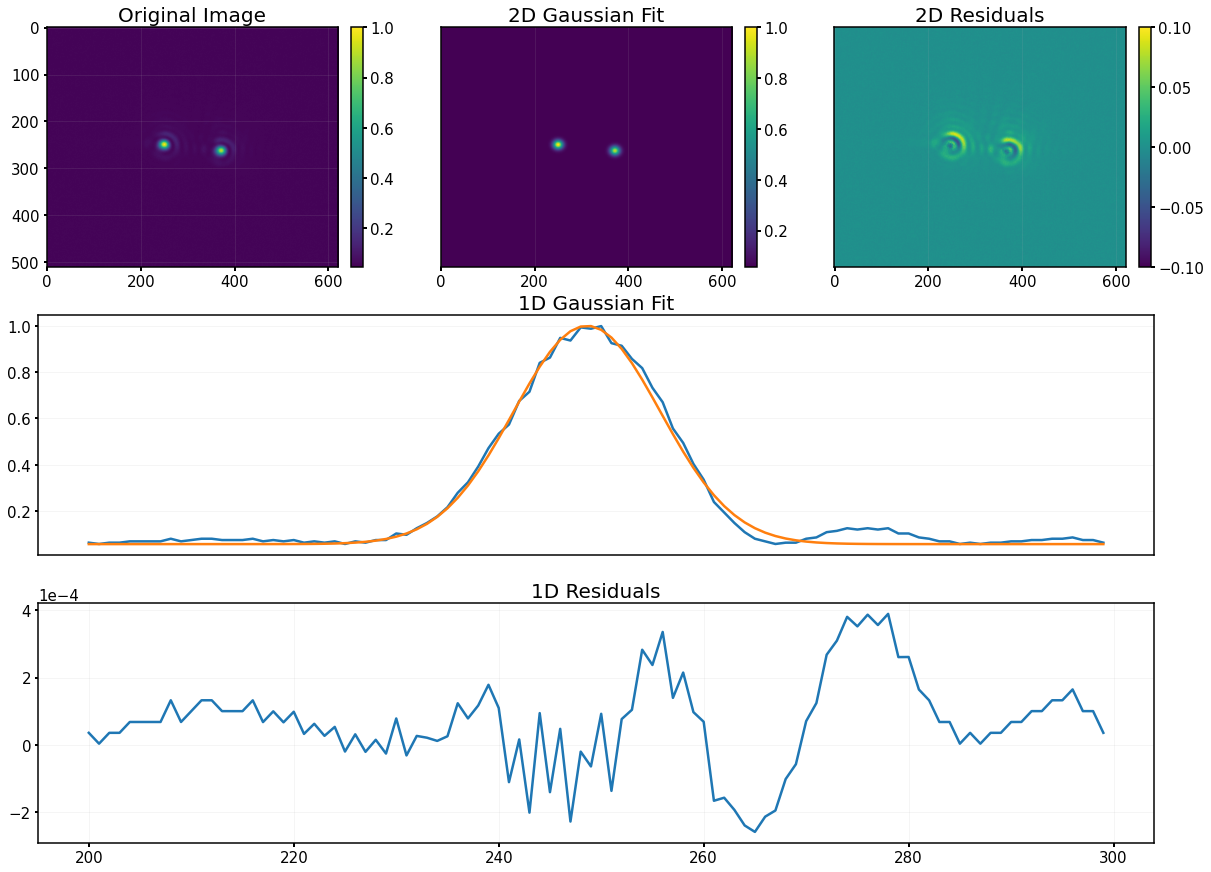

In [51]:
reloadMyModules(29,'october','2023')
file_path = '77_Ti_side.bmp'
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
threshold =91
coords = findImageMaximaCoords(data,2,threshold=threshold,neighborhood_size=20)
data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
plt.imshow(data)
initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
optParam,im_norm,zpts_fit_norm,fit_diff_norm = fitManyGaussianImagePinhole(data, 2, neighborhood_size=20, threshold=threshold)


In [ ]:
reloadMyModules(29)
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImagePinhole
file_path = 'C:\\Users\\Regal Lab\\Desktop\\Pinhole\\nist_10_22_22\\200nm_10Ti_400Au\\31.bmp' #7 and 16
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:,1]
data = data[500:1600,1100:2300]
# data = data[720:880,280:440] # left pinhole
data = data[375:520,680:830] # right pinhole
imshow(data)
threshold =60
coords = findImageMaximaCoords(data,1,threshold=threshold,neighborhood_size=20)
# print(coords)
# data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
# initfit,im,gfit,diff = extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
optParam,im_norm,zpts_fit_norm,fit_diff_norm = fitManyGaussianImagePinhole(data, 1, neighborhood_size=20, threshold=threshold)
print(optParam)

In [38]:
np.arange(0,10)/2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [16]:
reload(ah)

<module 'Analysis_Python_Files.AnalysisHelpers' from '/Users/stpa0446/Library/Mobile Documents/com~apple~CloudDocs/Documents/B232_Data_Analysis/Metalense/../Analysis_Python_Files/AnalysisHelpers.py'>

Found 2 Maxima.
Found 2 Maxima.
sigma_x (pinhole 1) =  0.48044 um
sigma_y (pinhole 1) 0.45642 um
average waist (pinhole 1)=  0.46843 um
Airy NA (pinhole 1) = 0.4370+/-0.0028
Gauss NA (pinhole 1) = 0.513+/-0.007
Average NA (pinhole 1) = 0.475+/-0.004
sigma_x (pinhole 2) =  0.45372 um
sigma_y (pinhole 2) 0.49292 um
average waist (pinhole 2)=  0.47332 um
Airy NA (pinhole 2) = 0.4301+/-0.0031
Gauss NA (pinhole 2) = 0.567+/-0.010
Average NA (pinhole 2) = 0.498+/-0.005
Found 2 Maxima.
[(250, 250), (245, 296)]


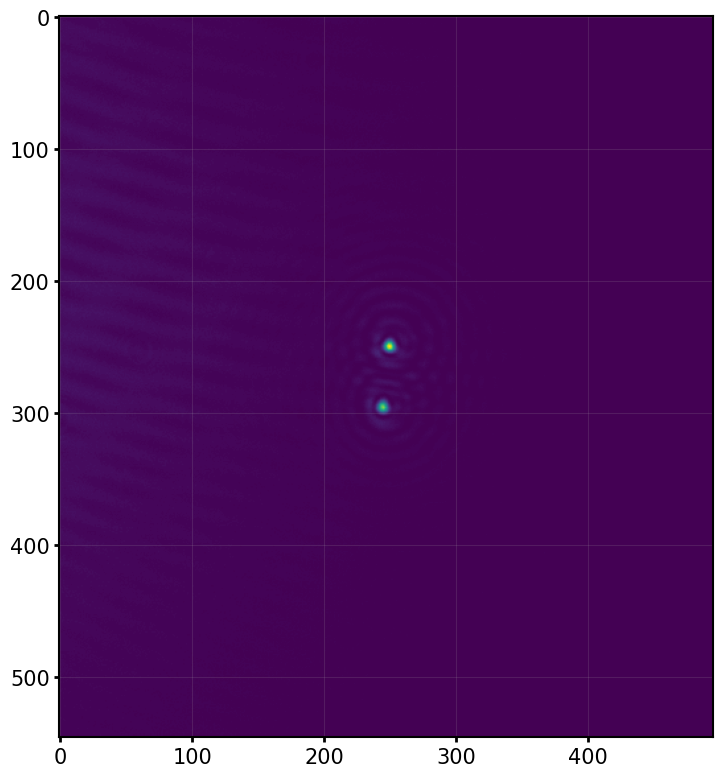

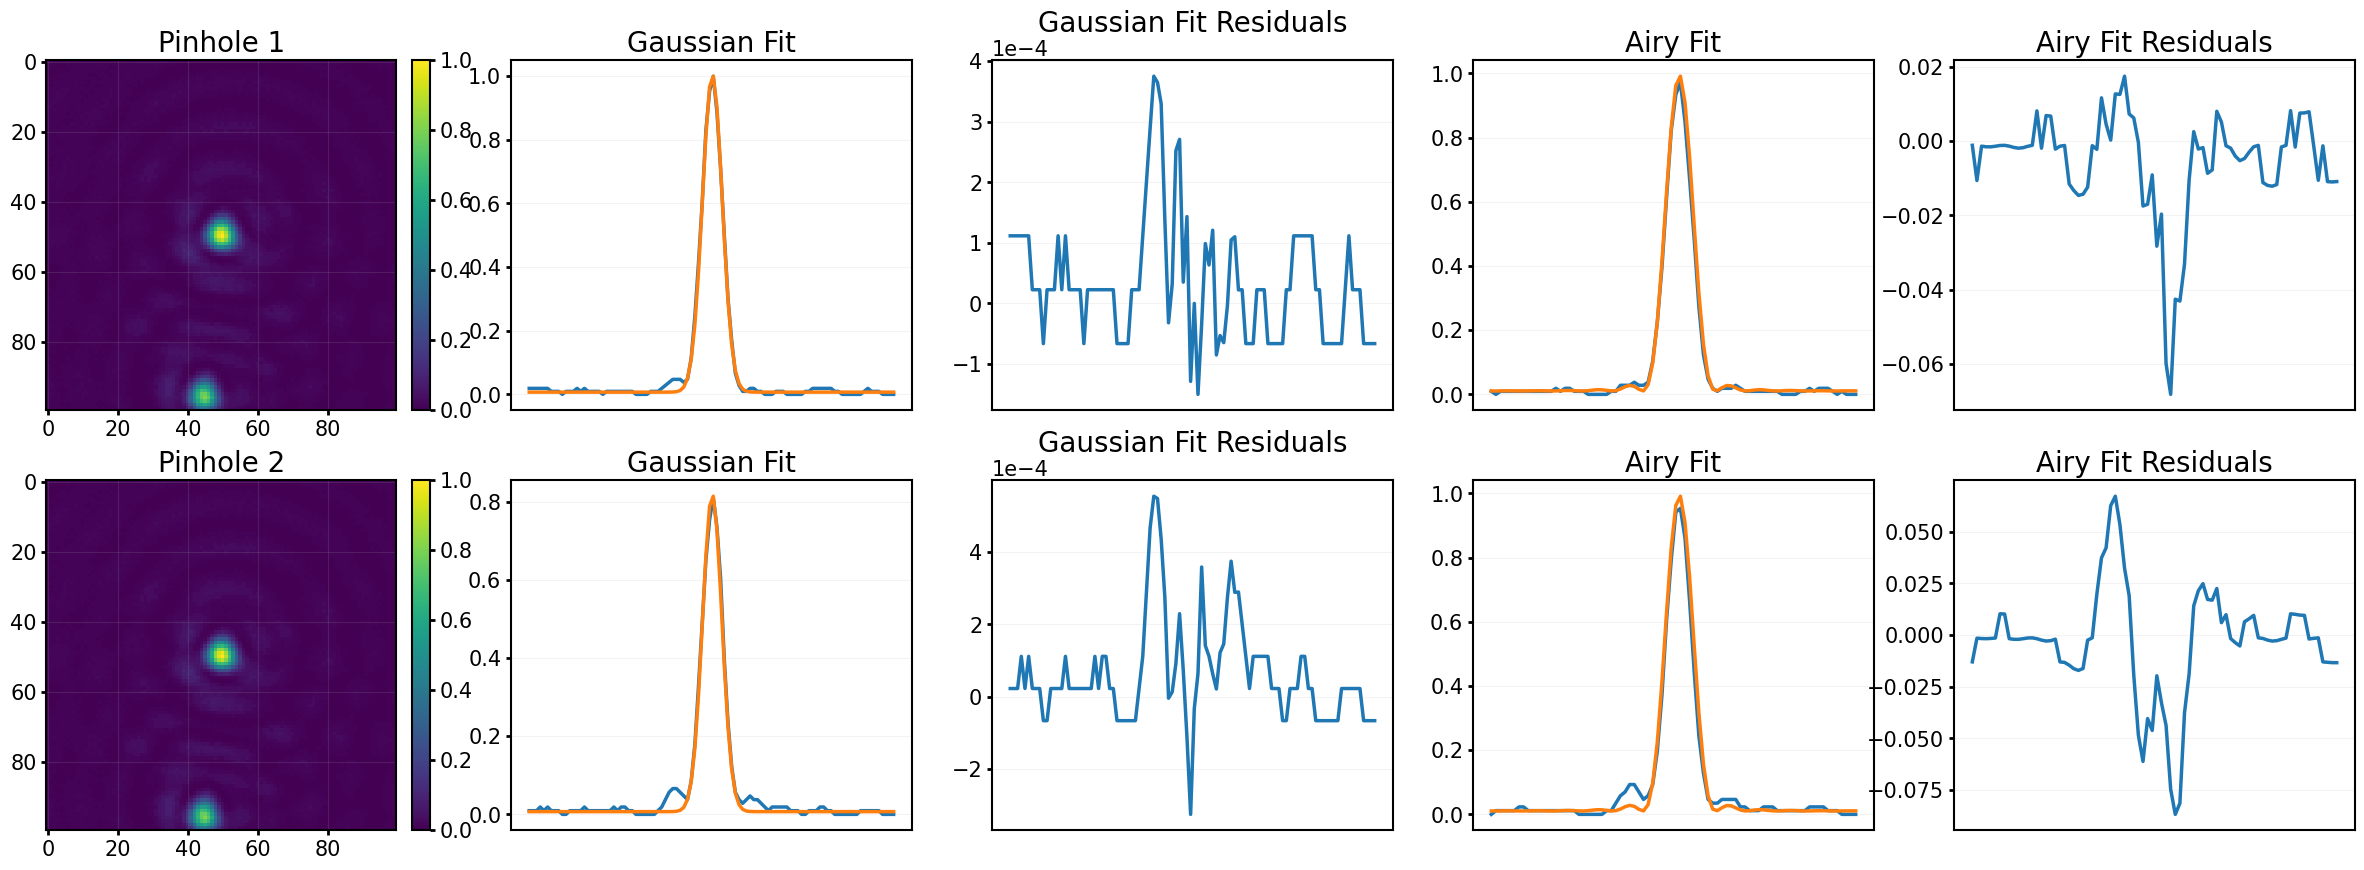

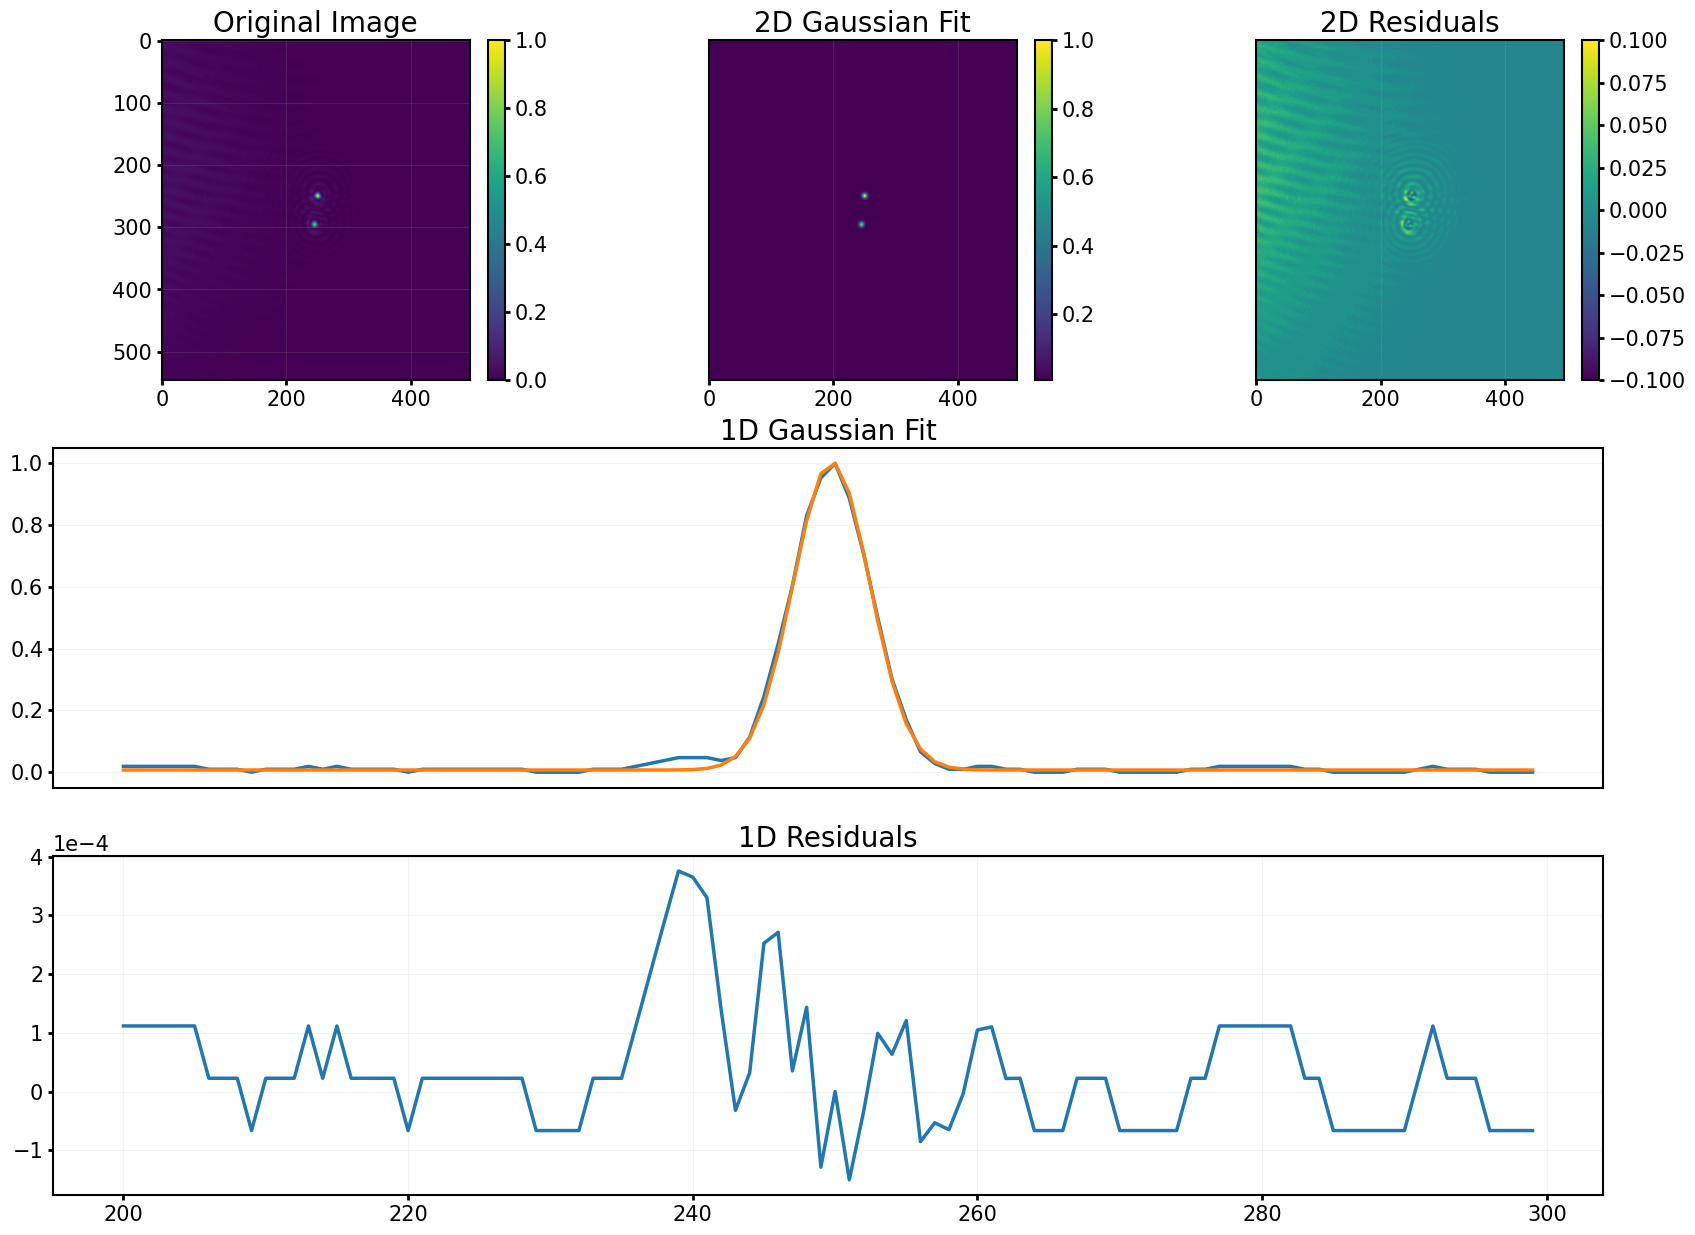

In [17]:
# reloadMyModules(29,'october','2023')
file_path = 'nist_c240_1.bmp'
imageToMatrix  = imread(file_path)
data = imageToMatrix[:,:]
threshold =50
coords = findImageMaximaCoords(data,2,threshold=threshold,neighborhood_size=20)
data = data[coords[0][1]-250:coords[1][1]+250,coords[0][0]-250:coords[1][0]+250]
plt.imshow(data)
initfit,im,gfit,diff = ah.extract_NA_2pinholes(data,2,threshold=threshold,neighborhood_size=20) ### [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2, xo_2, yo_2, sigma_x_2, sigma_y_2, etc. ]
optParam,im_norm,zpts_fit_norm,fit_diff_norm = ah.fitManyGaussianImagePinhole(data, 2, neighborhood_size=20, threshold=threshold)
